

# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas como ayuda para entender como estñá progresando la enfermedad.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [96]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [97]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [98]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [99]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [100]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [101]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [102]:
df.describe()

ine_code    new_cases          PCR        TestAc       activos  \
count  19788.000000  6618.000000  5379.000000    685.000000   2384.000000   
mean      26.497271   106.715020   130.306984  18605.835036   1137.170721   
std       15.009774   222.740333   260.696852  31743.923137   1625.616861   
min        1.000000    -2.000000    -1.000000      0.000000     -1.000000   
25%       13.000000     8.000000    10.000000      7.000000    223.000000   
50%       26.000000    39.000000    54.000000    332.000000    592.000000   
75%       40.000000   104.000000   142.000000   5293.000000   1252.250000   
max       52.000000  4223.000000  3968.000000  87107.000000  14617.000000   

       hospitalized  hospitalized_accumulated  hospitalized_new  \
count  13511.000000               1446.000000       1437.000000   
mean     190.683221               9760.419087        904.040362   
std      686.724624              20770.694870       1368.865581   
min        0.000000                  0.000000         -3.000000   
25%       19.000000                249.000000        123.000000   
50%       70.000000                869.000000        350.000000   
75%      171.000000               2045.000000       1087.000000   
max    15227.000000              81345.000000       6857.000000   

       intensive_care      deceased  cases_accumulated  cases_accumulated_PCR  \
count    13734.000000  15196.000000        9808.000000           10693.000000   
mean        30.408403    713.641879       12987.777631           15323.976246   
std         83.794011   2003.118406       28719.363888           45228.888867   
min          0.000000      0.000000           0.000000               0.000000   
25%          3.000000    117.000000        1305.000000            1913.000000   
50%         11.000000    268.000000        3476.500000            4125.000000   
75%         30.000000    499.000000       12698.250000           10120.000000   
max       1528.000000  14799.000000      323121.000000          460729.000000   

          recovered  deceased_hosp_eus     num_casos  num_casos_prueba_pcr  \
count   9730.000000         585.000000  19760.000000           19760.00000   
mean    4411.709235         391.068376    110.957186              94.64418   
std     8625.310640         243.192336    313.734040             277.47754   
min        0.000000         130.000000      0.000000               0.00000   
25%      574.000000         219.000000      1.000000               1.00000   
50%     1543.500000         285.000000     23.000000              19.00000   
75%     3571.750000         594.000000    102.000000              88.00000   
max    92641.000000        1000.000000   6748.000000            6733.00000   

       num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
count               19760.00000         19760.000000            19760.000000   
mean                    0.02419             4.965536                0.179251   
std                     0.22230            27.554487                1.935431   
min                     0.00000             0.000000                0.000000   
25%                     0.00000             0.000000                0.000000   
50%                     0.00000             0.000000                0.000000   
75%                     0.00000             0.000000                0.000000   
max                     5.00000           576.000000               81.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  19760.000000  1.978800e+04        9808.000000   
mean                      11.144028  9.040510e+05        1210.633928   
std                       82.815141  1.176169e+06        1447.027472   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.167980e+05         188.627500   
50%                        0.000000  5.810780e+05         586.470000   
75%                        1.000000  1.022800e+06      

y un muestreo de valores y de algunas columnas de interés:

In [103]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  hospitalized_accumulated  \
0  NaN     NaN      NaN           NaN                       NaN   
1  NaN     NaN      NaN           NaN                       NaN   
2  NaN     NaN      NaN           NaN                       NaN   
3  NaN     NaN      NaN           NaN                       NaN   
4  NaN     NaN      NaN           NaN                       NaN   

   hospitalized_new  intensive_care  deceased  cases_accumulated  \
0               NaN             NaN       NaN                NaN   
1               NaN             NaN       NaN                NaN   
2               NaN             NaN       NaN                NaN   
3               NaN             NaN       NaN                NaN   
4               NaN             NaN       NaN                NaN   

   cases_accumulated_PCR  recovered  deceased_hosp_eus  num_casos  \
0                    NaN        NaN                NaN        0.0   
1                    NaN        NaN                NaN        2.0   
2                    NaN        NaN                NaN        3.0   
3                    NaN        NaN                NaN        0.0   
4                    NaN        NaN                NaN        0.0   

   num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_ag  \
0                   0.0                       0.0                  0.0   
1                   1.0                       0.0                  0.0   
2                   2.0                       0.0                  1.0   
3                   0.0                       0.0                  0.0   
4                   0.0                       0.0                  0.0   

   num_casos_prueba_elisa  num_casos_prueba_desconocida  poblacion  \
0                     0.0                           0.0     388167   
1                     0.0                           1.0    1858683   
2                     0.0                           0.0     716820   
3                     0.0                           0.0     331549   
4                     0.0                           0.0    1022800   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                NaN                         NaN                   NaN   
1                NaN                         NaN                   NaN   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN           NaN           

In [104]:
df.tail()

date           province  ine_code                  ccaa  \
19783  2021-01-15              Soria        42       Castilla y León   
19784  2021-01-15             Toledo        45  Castilla - La Mancha   
19785  2021-01-15  Valencia/València        46  Comunitat Valenciana   
19786  2021-01-15         Valladolid        47       Castilla y León   
19787  2021-01-15             Zamora        49       Castilla y León   

       new_cases    PCR  TestAc  activos  hospitalized  \
19783       43.0    NaN     NaN      NaN          21.0   
19784        NaN  884.0     NaN      NaN         418.0   
19785     4223.0    NaN     NaN      NaN        1457.0   
19786      598.0    NaN     NaN      NaN         198.0   
19787      134.0    NaN     NaN      NaN          53.0   

       hospitalized_accumulated  hospitalized_new  intensive_care  deceased  \
19783                       NaN               NaN             6.0     183.0   
19784                       NaN               NaN            32.0    1587.0   
19785                       NaN               NaN           260.0    1894.0   
19786                       NaN               NaN            48.0     848.0   
19787                       NaN               NaN             9.0     348.0   

       cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
19783                NaN                 6333.0      777.0                NaN   
19784                NaN                44981.0        NaN                NaN   
19785           106617.0                    NaN    92641.0                NaN   
19786                NaN                35746.0     4894.0                NaN   
19787                NaN                 9715.0     1450.0                NaN   

       num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
19783        NaN                   NaN                       NaN   
19784        NaN                   NaN                       NaN   
19785        NaN                   NaN                       NaN   
19786        NaN                   NaN                       NaN   
19787        NaN                   NaN                       NaN   

       num_casos_prueba_ag  num_casos_prueba_elisa  \
19783                  NaN                     NaN   
19784                  NaN                     NaN   
19785                  NaN                     NaN   
19786                  NaN                     NaN   
19787                  NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
19783                           NaN      88636                NaN   
19784                           NaN     694844                NaN   
19785                           NaN    2565124            4156.41   
19786                           NaN     519546                NaN   
19787                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
19783                        6.77                206.46   
19784                        4.61                228.40   
19785                       10.14                 73.84   
19786                        9.24                163.22   
19787                        5.22                201.69   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
19783                    23.69           NaN          NaN             434.0   
19784                    60.16           NaN          NaN               NaN   
19785                    56.80           NaN      14580.0               NaN   
19786                    38.11           NaN          NaN            4087.0   
19787                    30.72           NaN          NaN             879.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
19783            295.0         43.0              42.1             43.0   
19784           3667.0          NaN               NaN            884.0   
19785              NaN          0.0            2082.9              N

In [105]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [106]:
df['date']=pd.to_datetime(df['date'])

In [107]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'hospitalized_accumulated',
       'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated',
       'cases_accumulated_PCR', 'recovered', 'deceased_hosp_eus', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_ag', 'num_casos_prueba_elisa',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source'

In [108]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_nuevos_paisvasco',
          'Bizkaia':'casos_nuevos_paisvasco', 'Gipuzkoa':'casos_nuevos_paisvasco',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

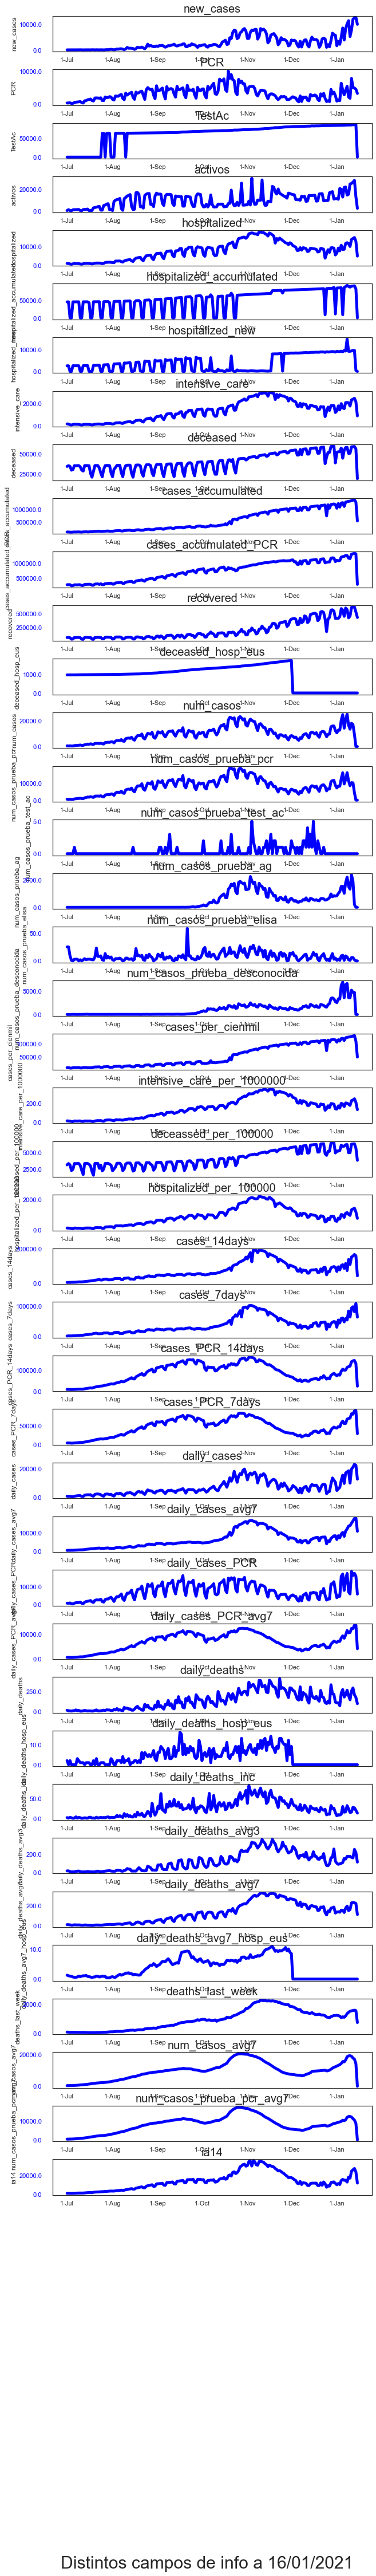

In [109]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [122]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'lightblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
casos_nuevos_paisvasco = 'casos_nuevos_paisvasco'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
pais_vasco=['Bizkaia','Araba/Álava','Gipuzkoa']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in pais_vasco:
    datos.loc[datos['province']==provincia,casos_nuevos_paisvasco]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']   
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


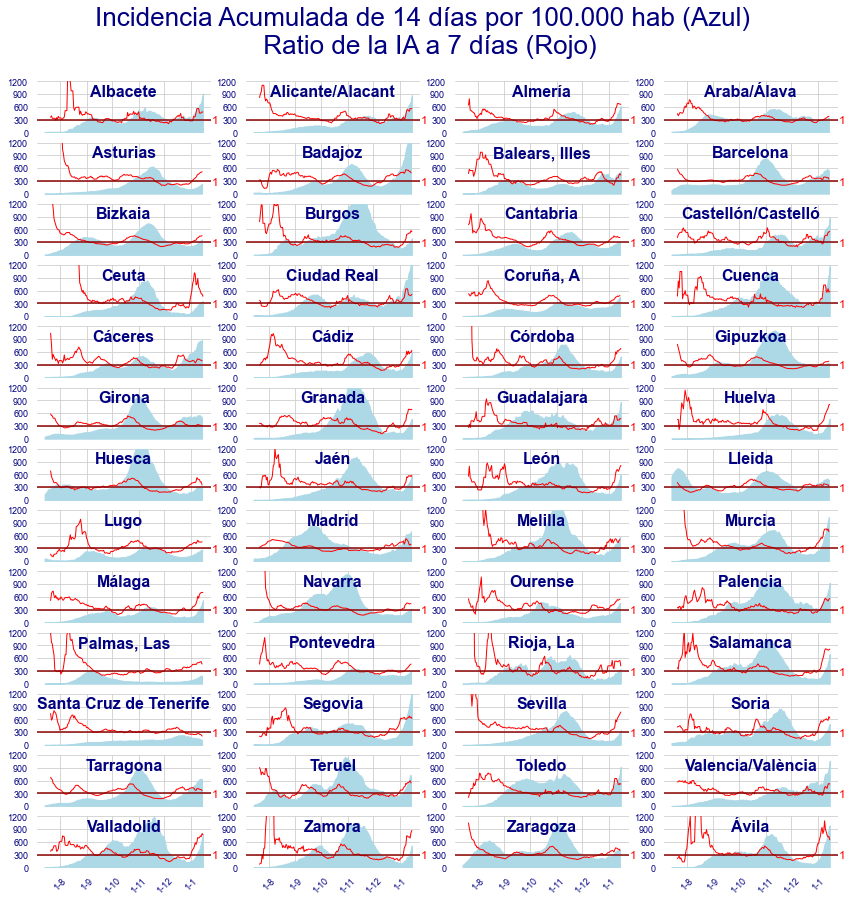

In [127]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province',hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0,sharey=False)

# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%-d-%-m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.set_ylim(0,1200)
    ax1.set_yticks([0,300,600,900,1200])
    #ax1.set_yticks([])
    ax1.yaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos)
    #ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.xaxis.set_tick_params(labelsize=9,width=0,labelcolor=color_titulos,rotation=45)
    ax1.xaxis.set_major_formatter(XmajorFmt)
    #ax1.set_xticks([])
    ax1.grid(True,axis='both',which='both')
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=1, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1]))
    ax2.axhline(1,color=color_linea)
    
g.map(grafica,'province')


g.set_titles("")
#g.set(yticks=[])
g.set(xlabel='')

g.despine(bottom=True, left=True)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9,wspace=0.2,hspace=0.2)
plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [130]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]
    
    y_max = datos_[AI].max()
    
    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%b')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1500)
        #ponemos limites variables dependiendo del maximo valor truncado a 100
        ax1.set_ylim(0,(y_max//100+1)*100)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy',rotation=45)
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        #vamos a imprimir el valor de la última IA14
        style = dict(size=12, color=color_titulos,weight='normal')
        texto = ax1.annotate('{:0.1f}'.format(df_datos.iloc[-1][AI]),
                            xy=(df_datos.iloc[-1]['date'],df_datos.iloc[-1][AI]),
                            xycoords='data',
                            xytext=(0, 0), 
                            textcoords='offset points',
                            **style)
        
        #Aqui presentamos la ratio: lo anulo
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=.5, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4.0) #la he cambiado desde 4
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.xaxis.set_tick_params(labelsize=14,width=25,length=25,direction='out',labelcolor='navy')
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
        
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

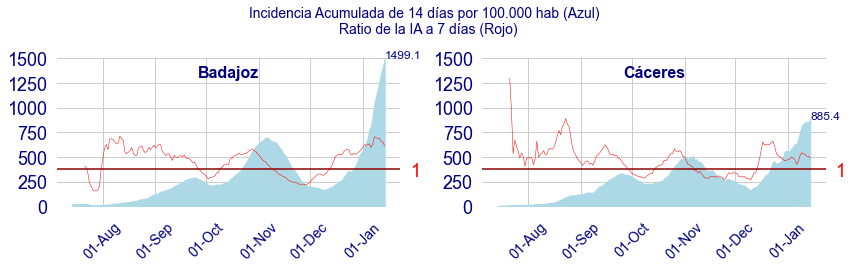

In [131]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

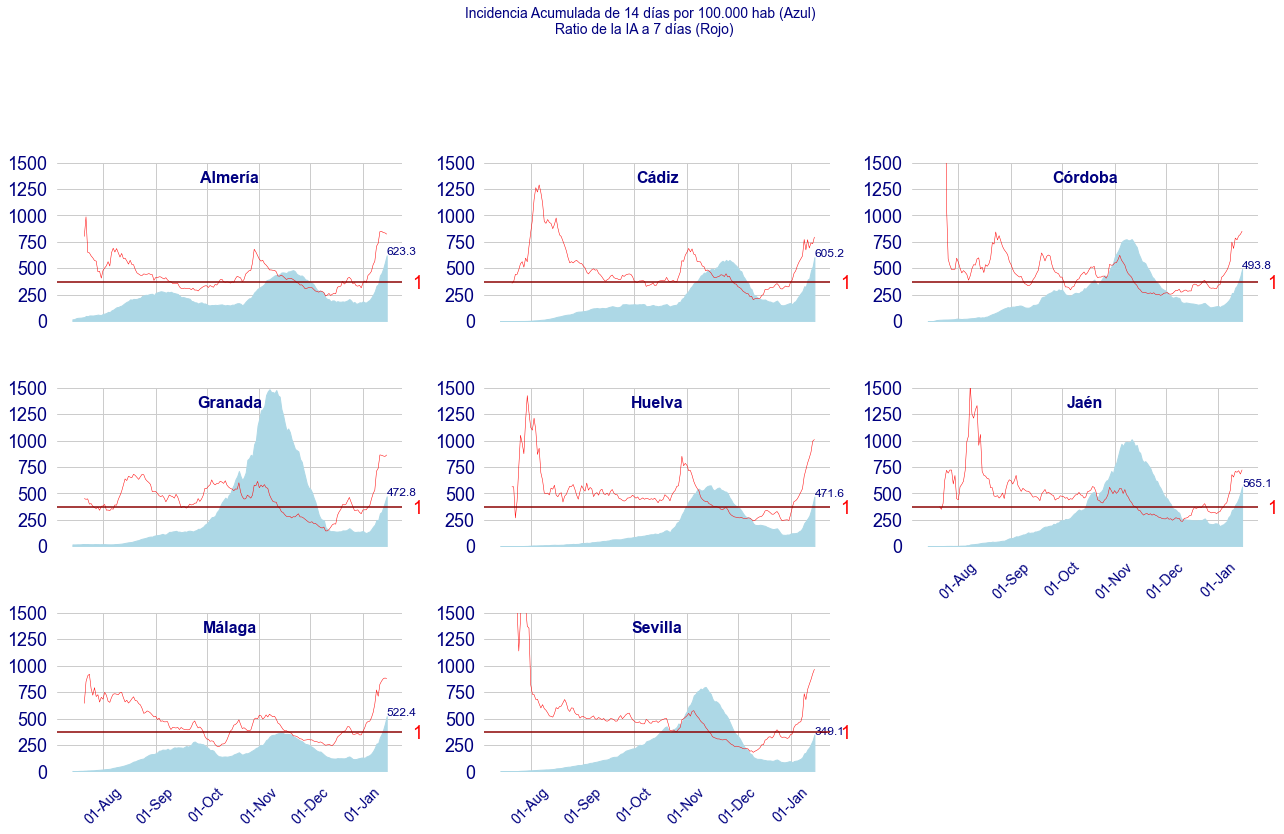

In [132]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

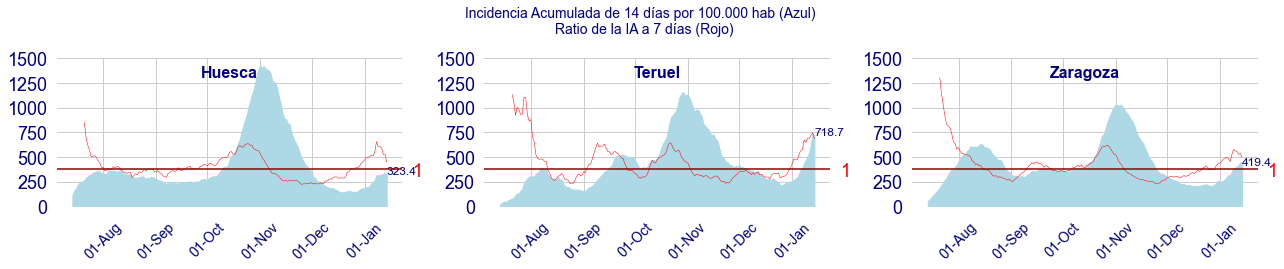

In [133]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

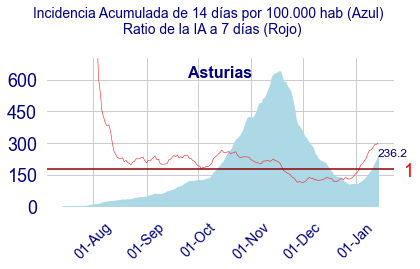

In [134]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

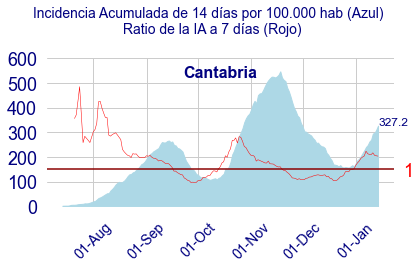

In [135]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

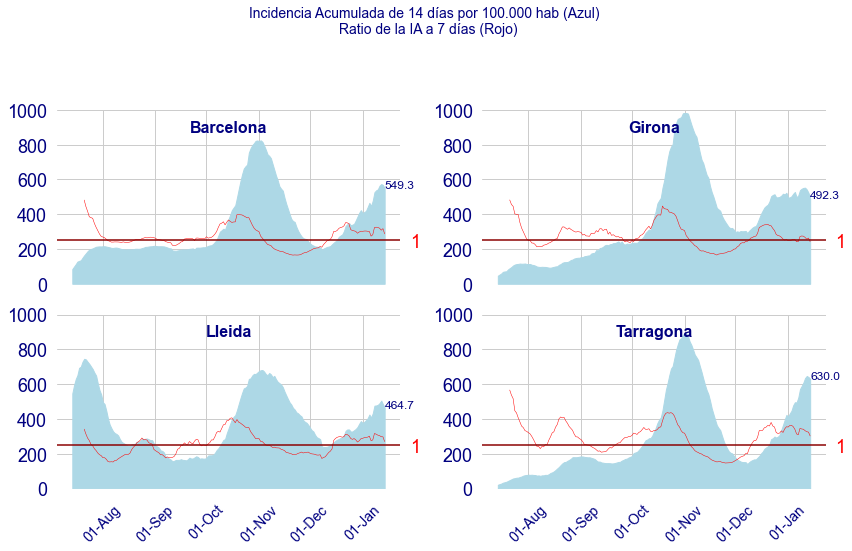

In [136]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

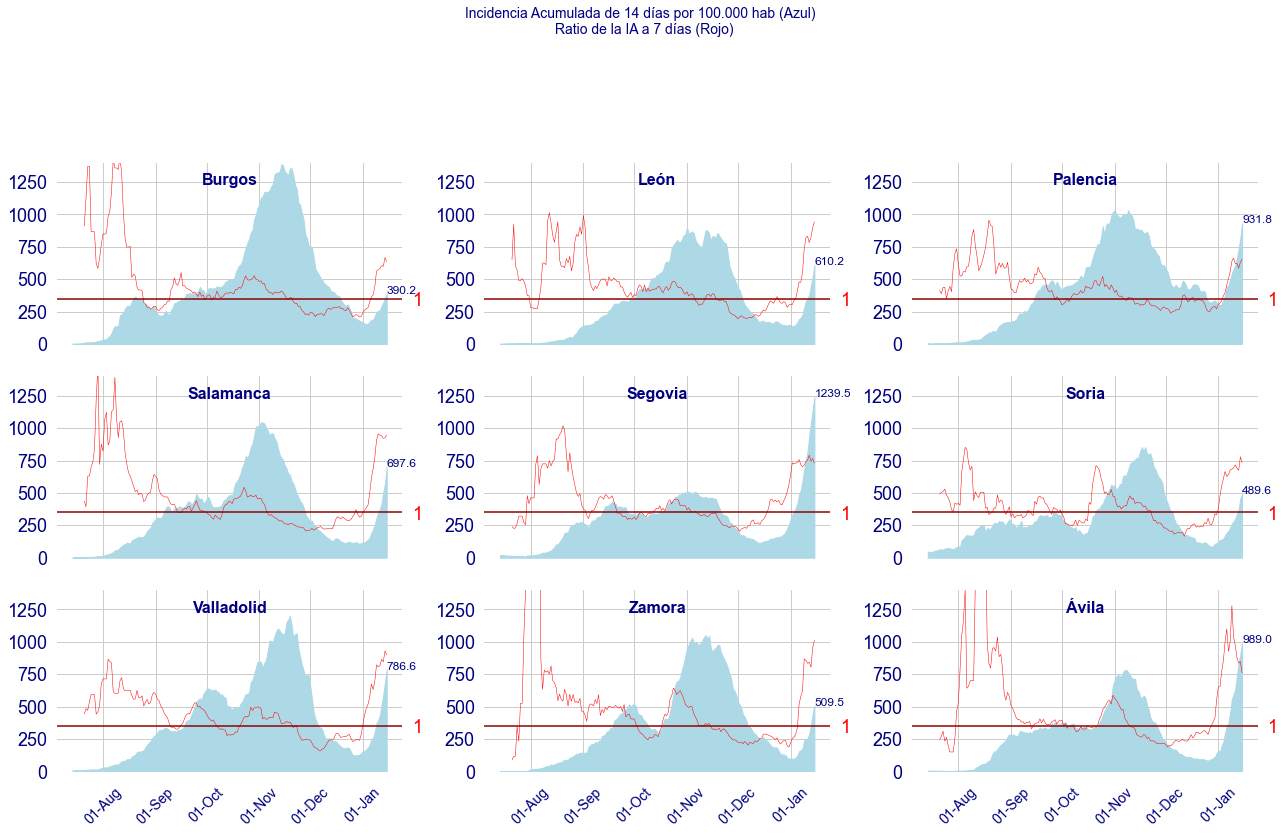

In [137]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

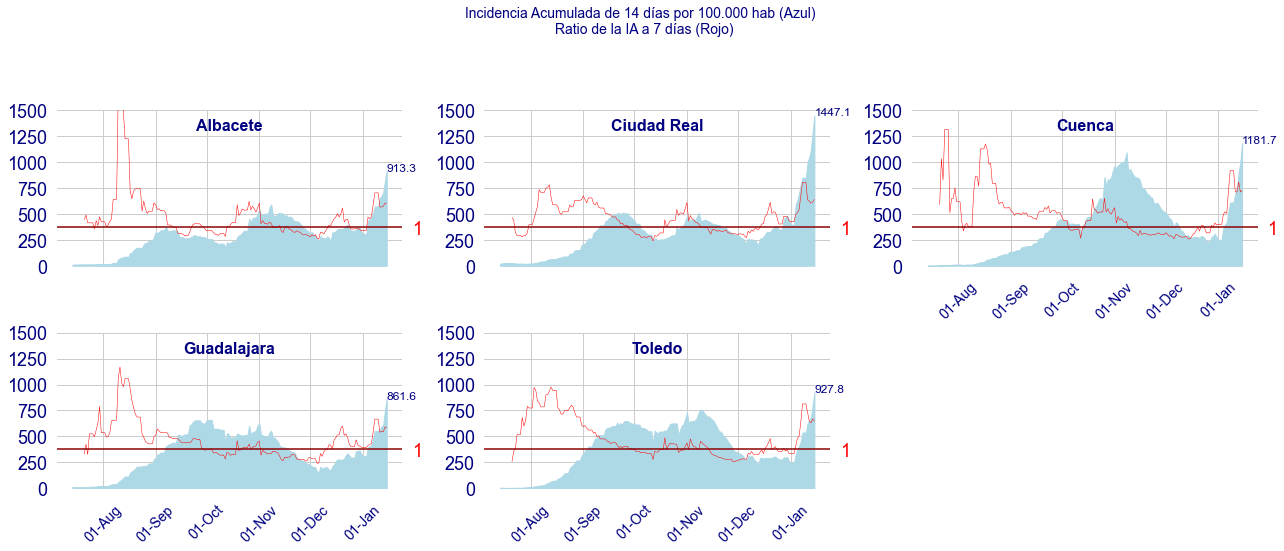

In [138]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

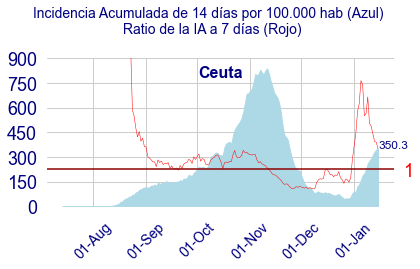

In [139]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

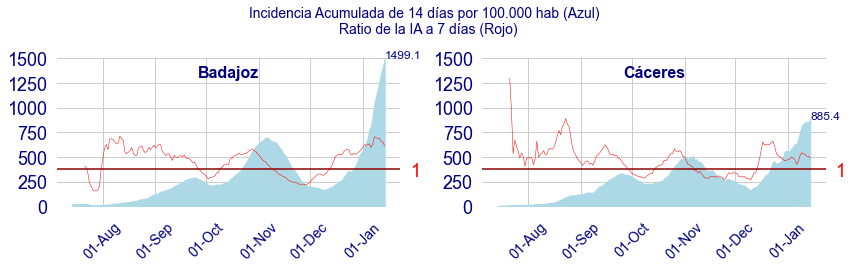

In [140]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

<Figure size 720x360 with 0 Axes>

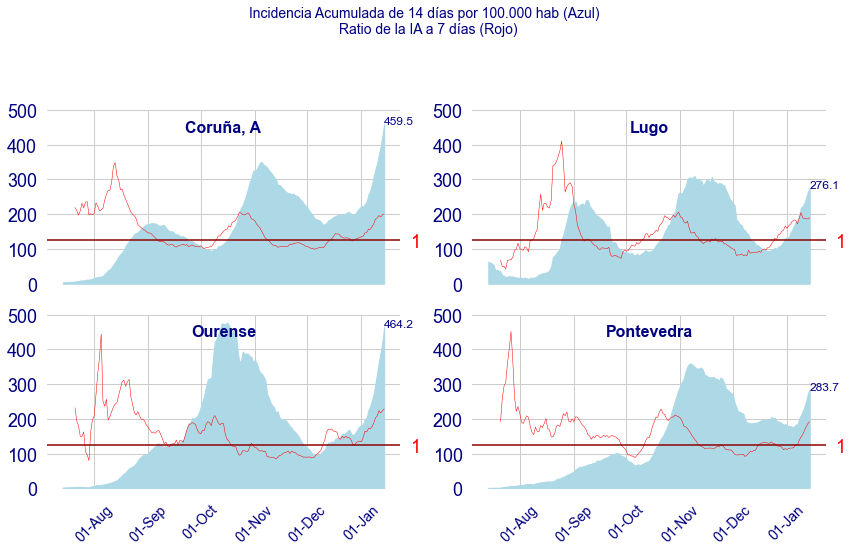

In [141]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

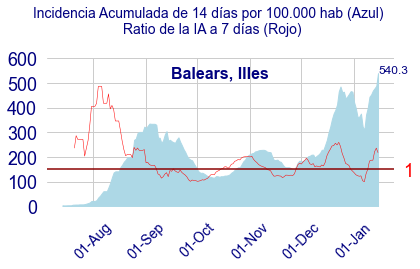

In [142]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

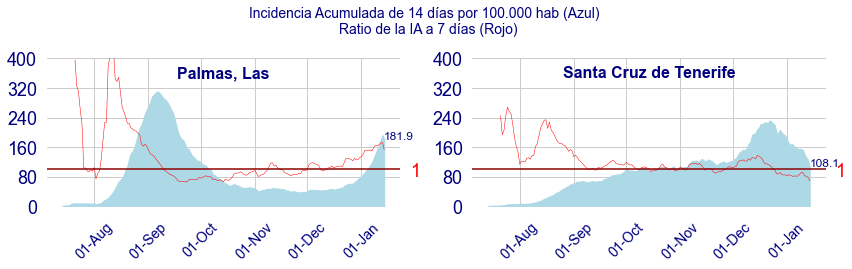

In [143]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

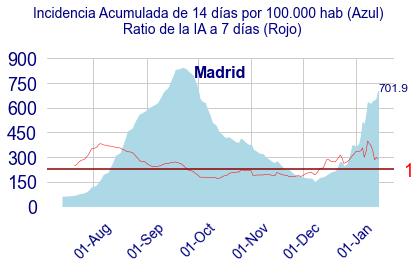

In [144]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

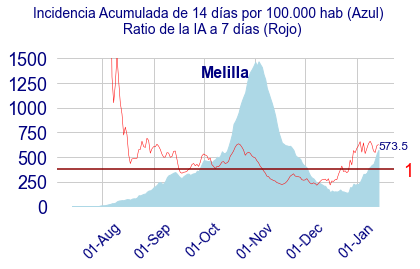

In [145]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

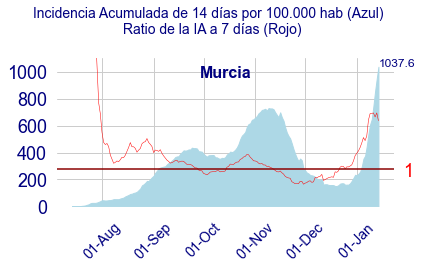

In [146]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

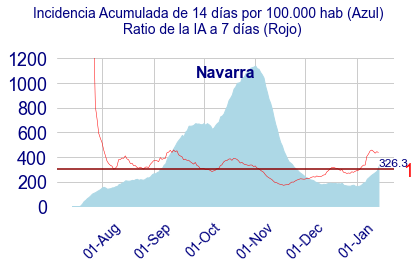

In [147]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

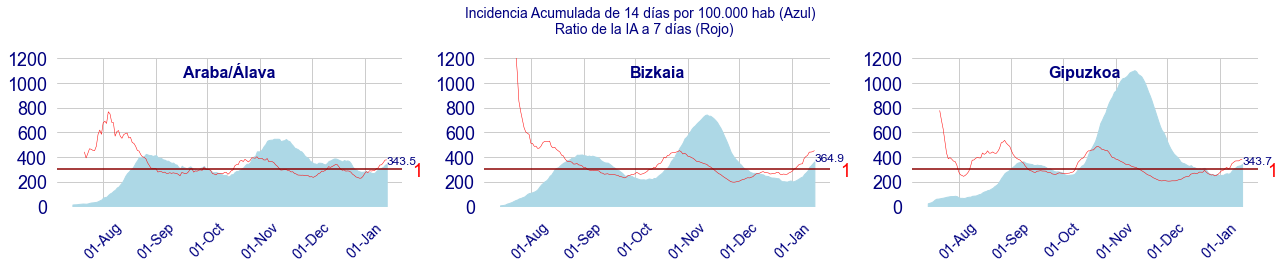

In [148]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

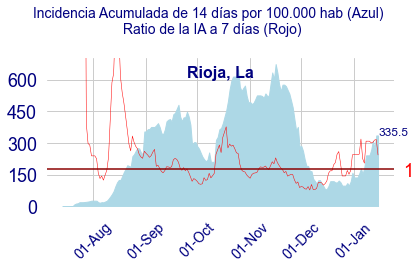

In [149]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

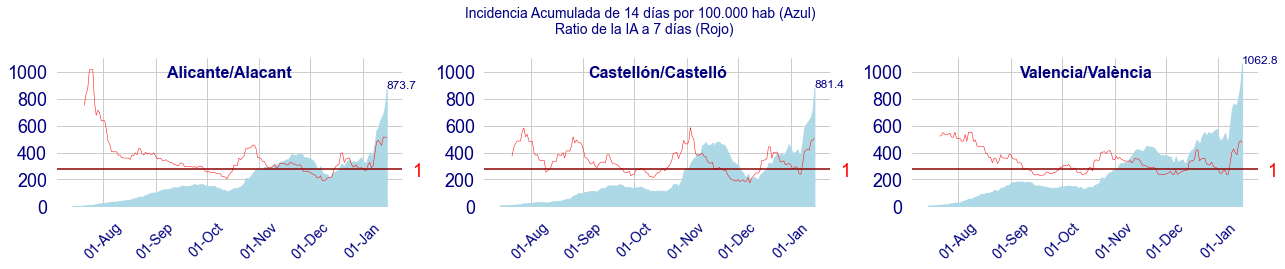

In [150]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

# Gráficos Hospitalizados

In [151]:
def grafico_hospitalizados (datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    hospitalizados = 'hospitalized_per_100000'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
        #ax1.set_ylim(0,1000)
        #ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,width=5,length=10,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='both',which='both')
        
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=14,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/hospit_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

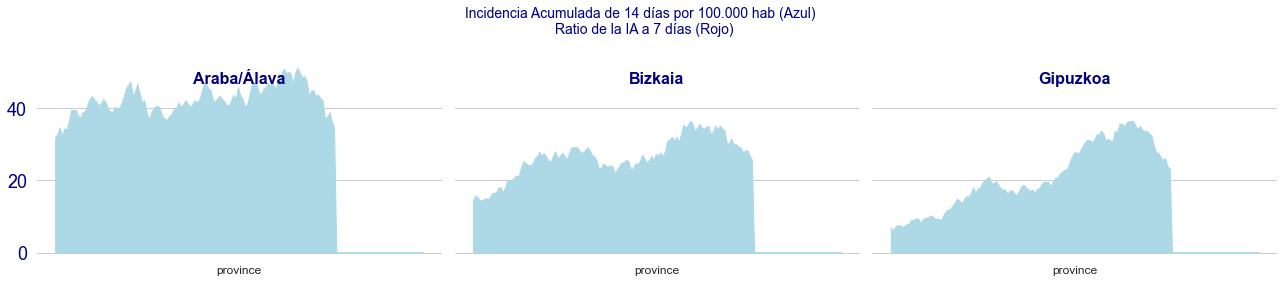

In [39]:
grafico_hospitalizados(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

# Multi provincia con Hospitalizados

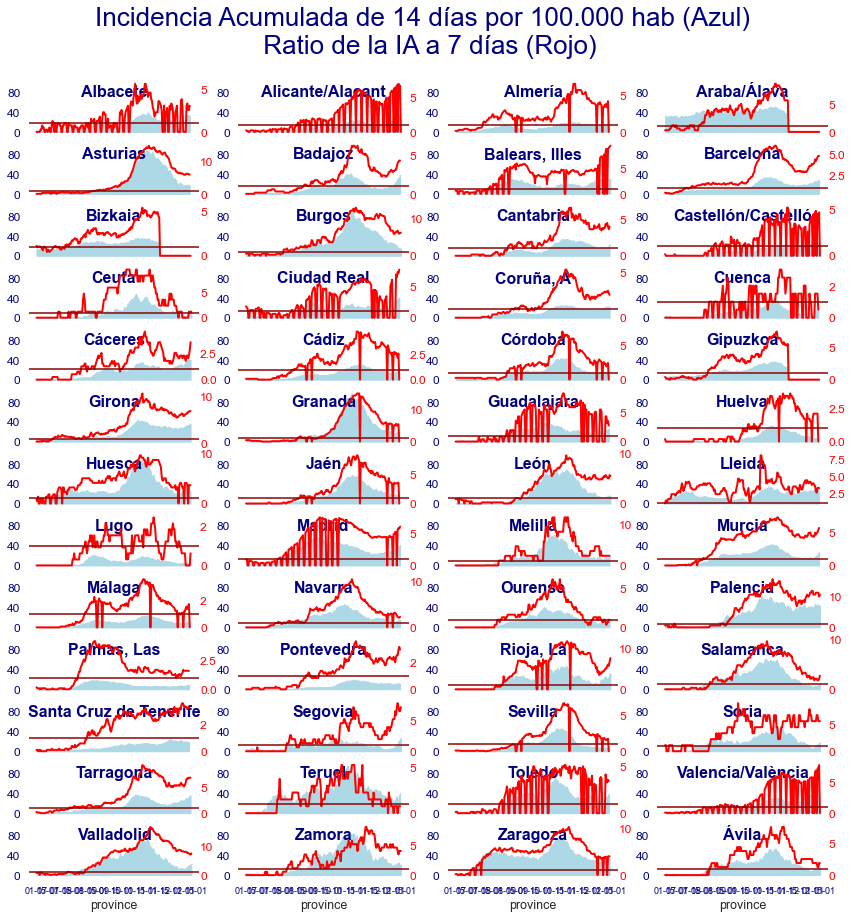

In [40]:

#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)

# Título

hospitalizados = 'hospitalized_per_100000'
uci ='intensive_care_per_1000000'

#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[hospitalizados],color=color_fill)
    
    
    
    #ax1.set_ylim(0,1200)
    #ax1.set_yticks([0,600,1200])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[uci], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,pad=-5,labelcolor=color_ratio)
    #ax2.set_ylim(0,4)
    #ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
#g.fig.subplots_adjust(top=.9)
g.fig.subplots_adjust(top=.9,wspace=0.23,hspace=.17)   

plt.savefig('graficos/hosp_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


In [176]:
def grafico_IA14_ratio_vs(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    color_tags = 'navy'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (EjeX) \n Ratio de la IA a 7 días (EjeY)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    #diccionario con el tamaño de los textos dependiendo del numero de columnas:
    #key=nº columnas, values=(tamaño titulos, nombre provincia, tamaño tags,ratio)
    
    text_size={1:(16,16,12,2),2:(22,20,14,2),3:(24,24,16,1.5)}
    datos_ = datos[(datos['date']>=datetime(year=2020,month=8,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(15,15))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', 
                      margin_titles=False, col_wrap=columnas,aspect=text_size[columnas][3], 
                      height=5.0, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    
    x_min = datos_[AI].min()
    x_max = ((datos_[AI].max() // 100)+1)*100
    y_min = datos_[clave_ratio].min()
    y_max = ((datos_[clave_ratio].max() // .5)+1)*.5
    if (y_max != y_max) or (y_max>3):
        y_max = 2
    print (columnas, y_max)
    
    
    def grafica(x, color, label):
        
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        colores1 = sns.color_palette("Blues",df_datos.shape[0])
        
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, 1.0, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=text_size[columnas][1],transform=ax1.transAxes)
        #metemos este cambio para que no intente imprimirla y se va de escala el gráfico
        df_datos.loc[:,clave_ratio]=df_datos.loc[:,clave_ratio].apply(lambda x:min(x,3.0))
        ax1.scatter(df_datos[AI],df_datos[clave_ratio],color=colores1)
    
    
        ax1.set_ylim(0,y_max)
        ax1.set_yticks(list(np.arange(0,y_max,1)))
        ax1.set_yticks([0,.5,1,1.5,2,2.5])
        
        ax1.set_xlim(0,x_max)
        #ax1.set_xlim(180,220)
        
        #ax1.set_xticks(np.arange(0,x_max,200))
        
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        #ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=18,width=5,length=10,labelcolor='navy')
        #ax1.set_xticks([])
        ax1.grid(False,axis='both',which='both')
        
        df_datos = df_datos.reset_index(drop=True)
        rango=np.arange(0,len(df_datos.index),15)
        rang=np.unique(np.append([0],rango))
        if abs(rang[-1]-len(df_datos.index)) >= 5:
            rang=np.unique(np.append(rango,[0,len(df_datos.index)-1]))
        df_datos= df_datos.iloc[list(rang)]
        ax1.axhline(1,color=color_linea)
        for indice in df_datos.index:
            style = dict(size=text_size[columnas][2], color=color_tags,weight='bold')
            texto = ax1.annotate(df_datos.loc[indice,'date'].strftime('%b%-d'),
                                xy=(df_datos.loc[indice,AI],df_datos.loc[indice,clave_ratio]),
                                xycoords='data',
                                xytext=(5, 5), 
                                textcoords='offset points',
                                **style)
            
        
        
    
    g.map(grafica,'province')



    g.set_titles('')
    g.set(xlabel='')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=text_size[columnas][0],color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=1,pad=1)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+'vs_'+nombre_fichero+'.png',dpi=144)  
    plt.show()
    return

1 2


<Figure size 1080x1080 with 0 Axes>

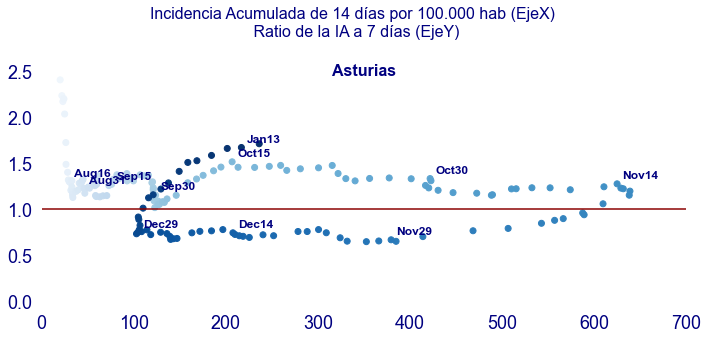

In [177]:
grafico_IA14_ratio_vs(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

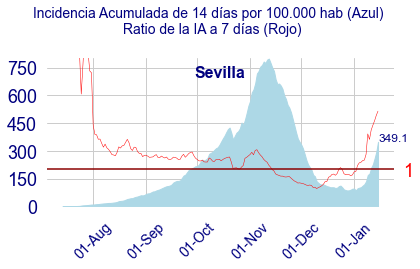

In [178]:
grafico_IA14_ratio(datos,campos,['Sevilla'],'sevilla')

<Figure size 720x360 with 0 Axes>

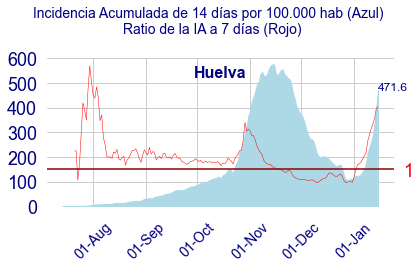

In [179]:
grafico_IA14_ratio(datos,campos,['Huelva'],'huelva')

<Figure size 720x360 with 0 Axes>

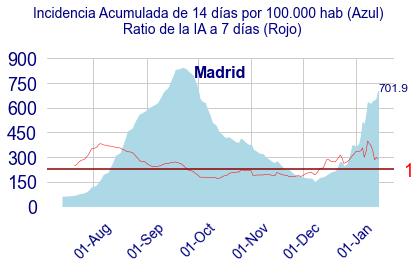

In [180]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

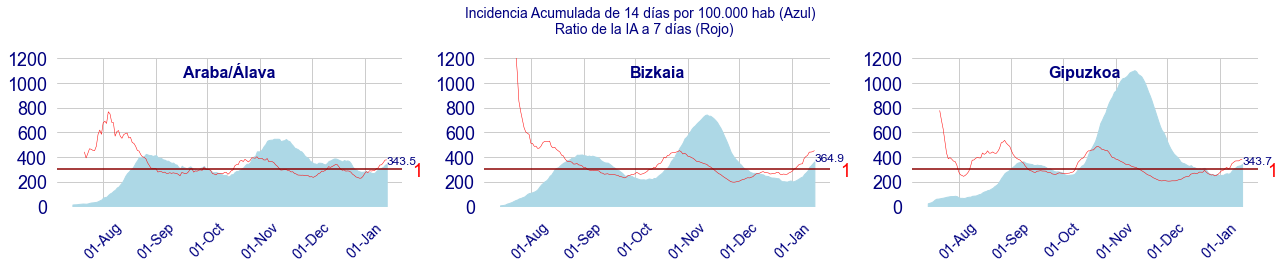

In [181]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

3 3.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

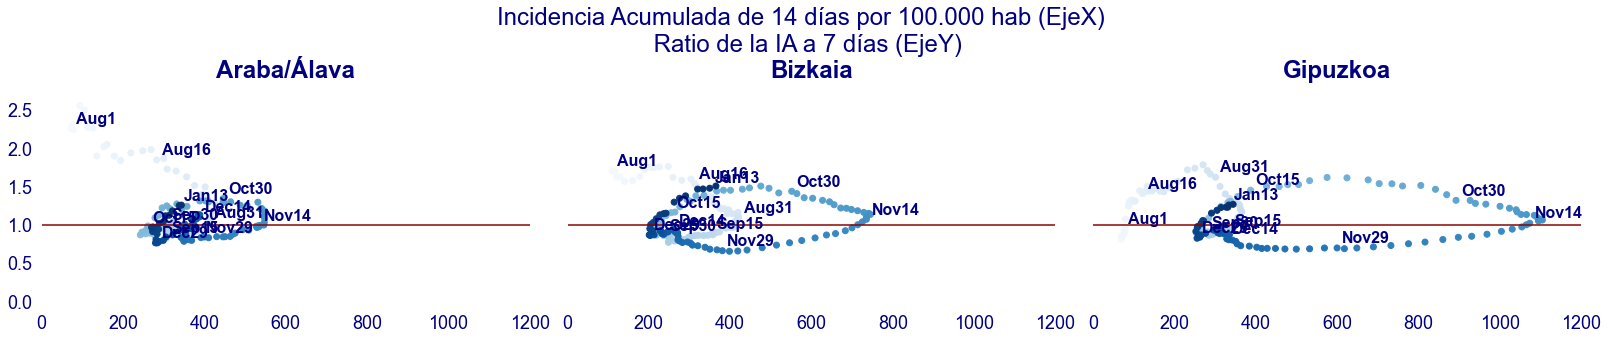

In [182]:
grafico_IA14_ratio_vs(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

1 2.0


<Figure size 1080x1080 with 0 Axes>

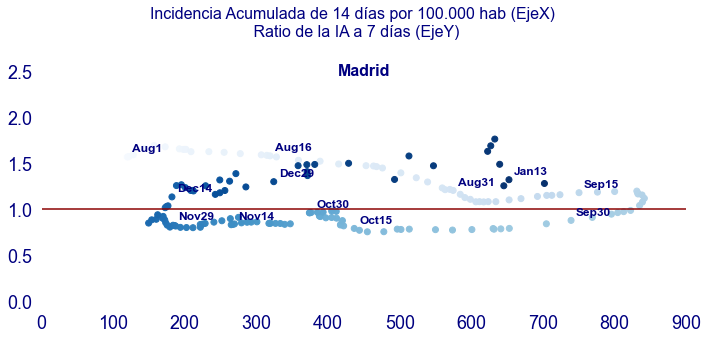

In [183]:
grafico_IA14_ratio_vs(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

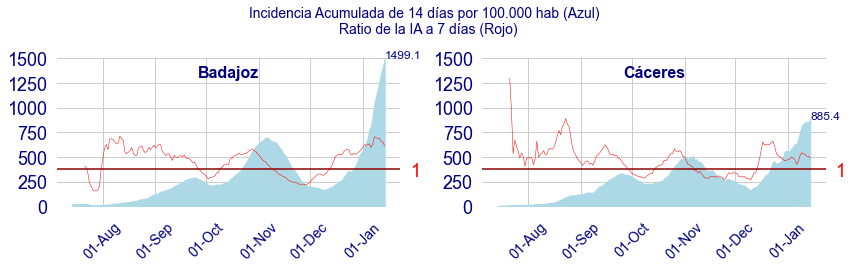

In [184]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')

2 2.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

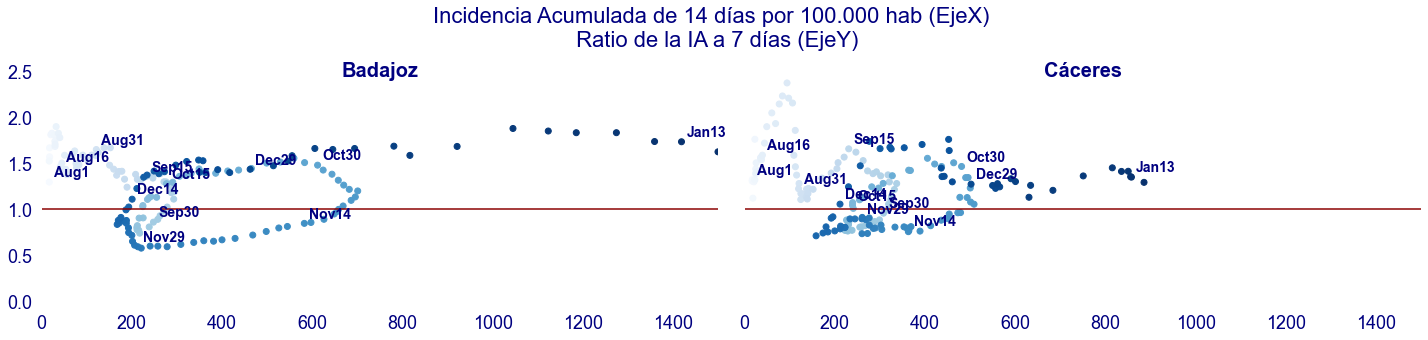

In [185]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz','Cáceres'],'extremadura')

1 2.0


<Figure size 1080x1080 with 0 Axes>

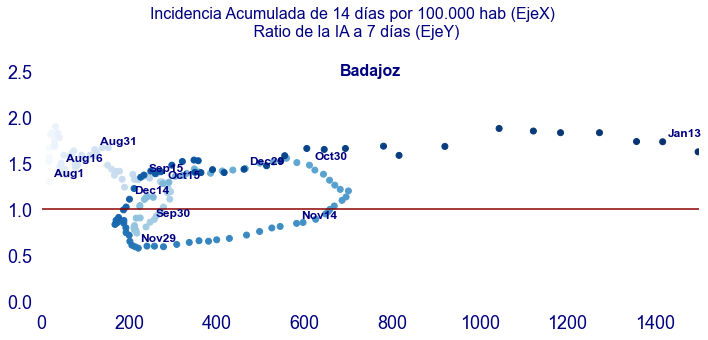

In [186]:
grafico_IA14_ratio_vs(datos,campos,['Badajoz'],'badajoz')

1 2.5


<Figure size 1080x1080 with 0 Axes>

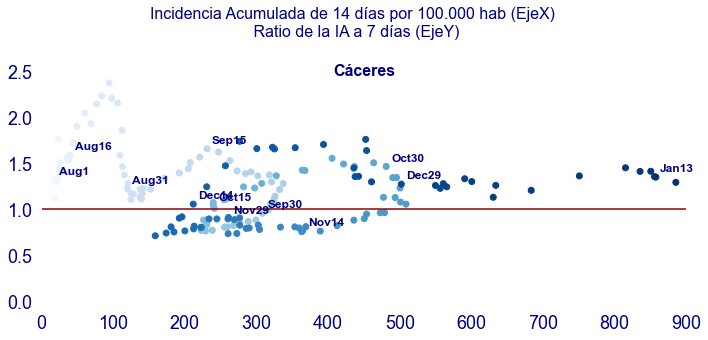

In [187]:
grafico_IA14_ratio_vs(datos,campos,['Cáceres'],'Caceres')

1 3.0


<Figure size 1080x1080 with 0 Axes>

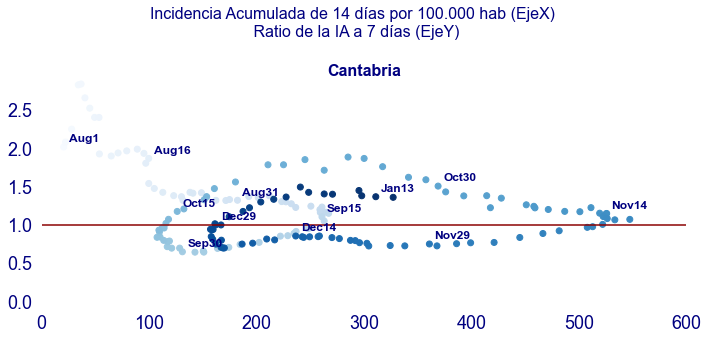

In [188]:
grafico_IA14_ratio_vs(datos,campos,['Cantabria'],'cantabria')

In [189]:
datos.loc[datos['province']=='Madrid']

date province  ine_code                  ccaa  new_cases  PCR  \
9494  2020-07-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9546  2020-07-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9598  2020-07-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9650  2020-07-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9702  2020-07-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9754  2020-07-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9806  2020-07-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9858  2020-07-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9910  2020-07-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
9962  2020-07-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10014 2020-07-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10066 2020-07-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10118 2020-07-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10170 2020-07-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10222 2020-07-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10274 2020-07-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10326 2020-07-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10378 2020-07-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10430 2020-07-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10482 2020-07-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10534 2020-07-21   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10586 2020-07-22   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10638 2020-07-23   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10690 2020-07-24   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10742 2020-07-25   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10794 2020-07-26   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10846 2020-07-27   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10898 2020-07-28   Madrid        28  Madrid, Comunidad de        0.0  0.0   
10950 2020-07-29   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11002 2020-07-30   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11054 2020-07-31   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11106 2020-08-01   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11158 2020-08-02   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11210 2020-08-03   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11262 2020-08-04   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11314 2020-08-05   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11366 2020-08-06   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11418 2020-08-07   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11470 2020-08-08   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11522 2020-08-09   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11574 2020-08-10   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11626 2020-08-11   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11678 2020-08-12   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11730 2020-08-13   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11782 2020-08-14   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11834 2020-08-15   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11886 2020-08-16   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11938 2020-08-17   Madrid        28  Madrid, Comunidad de        0.0  0.0   
11990 2020-08-18   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12042 2020-08-19   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12094 2020-08-20   Madrid        28  Madrid, Comunidad de        0.0  0.0   
12146 20

1 2.0


<Figure size 1080x1080 with 0 Axes>

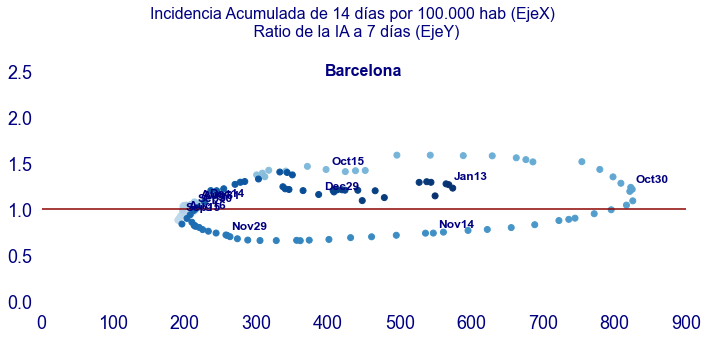

In [190]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona'],'barcelona')

2 2.0


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

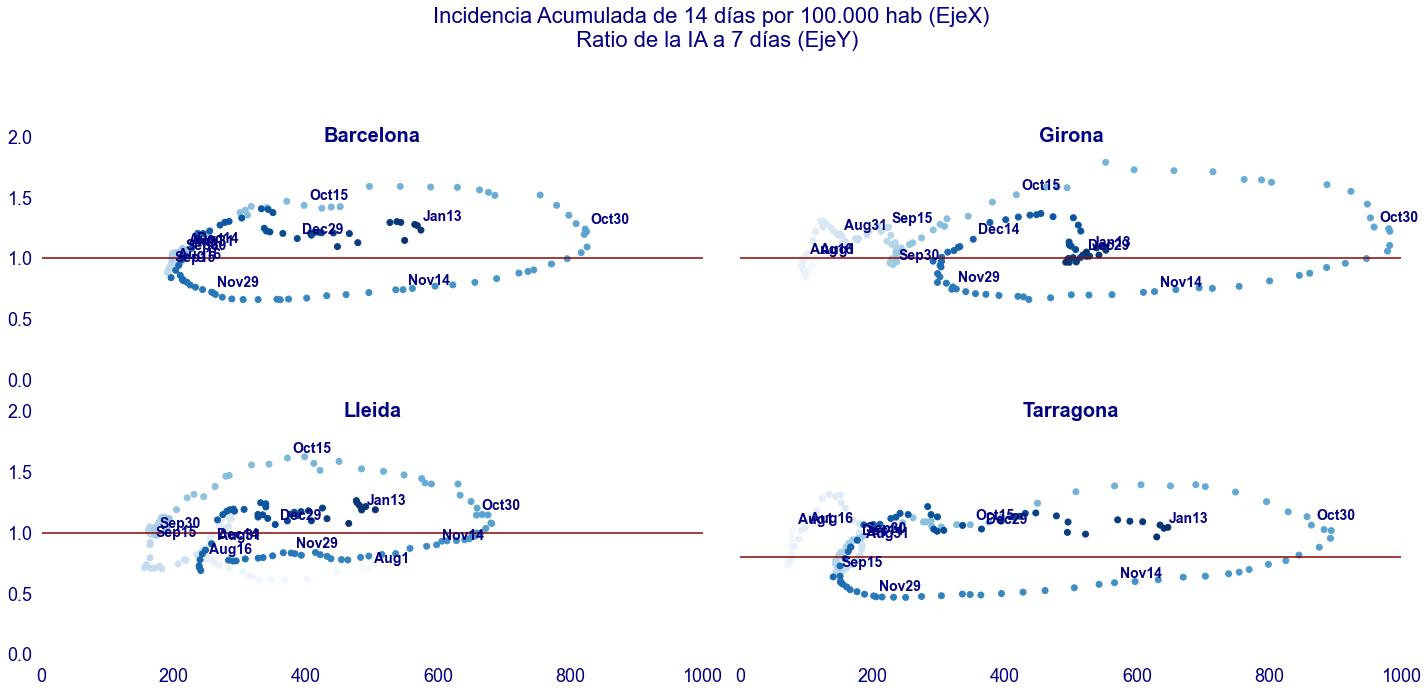

In [191]:
grafico_IA14_ratio_vs(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

1 2


<Figure size 1080x1080 with 0 Axes>

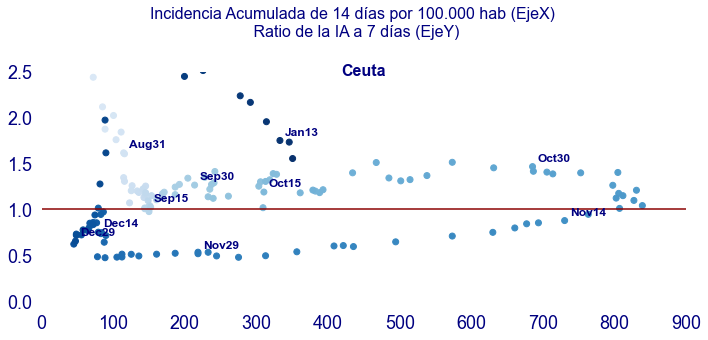

In [192]:
grafico_IA14_ratio_vs(datos,campos,['Ceuta'],'ceuta')

1 2


<Figure size 1080x1080 with 0 Axes>

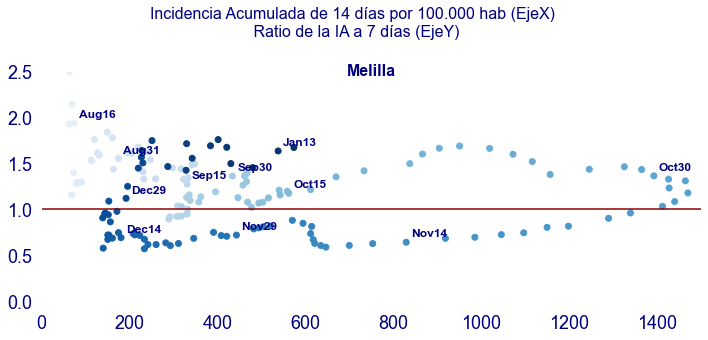

In [193]:
grafico_IA14_ratio_vs(datos,campos,['Melilla'],'melilla')

1 2.0


<Figure size 1080x1080 with 0 Axes>

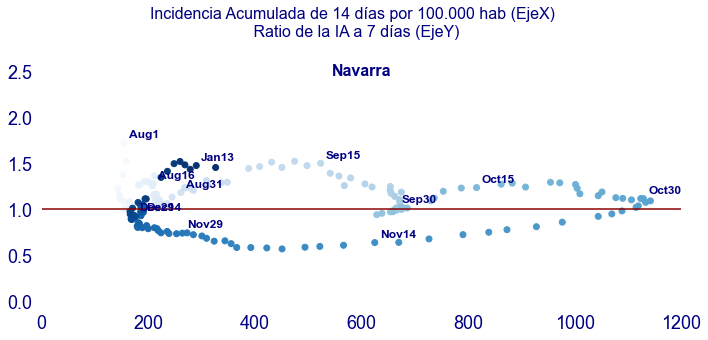

In [194]:
grafico_IA14_ratio_vs(datos,campos,['Navarra'],'navarra')

1 2


<Figure size 1080x1080 with 0 Axes>

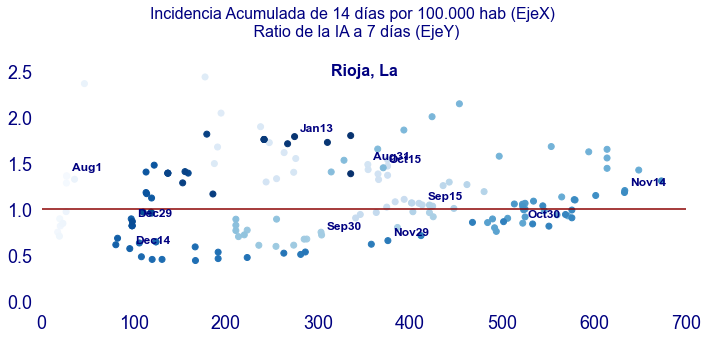

In [195]:
grafico_IA14_ratio_vs(datos,campos,['Rioja, La'],'rioja')

1 3.0


<Figure size 1080x1080 with 0 Axes>

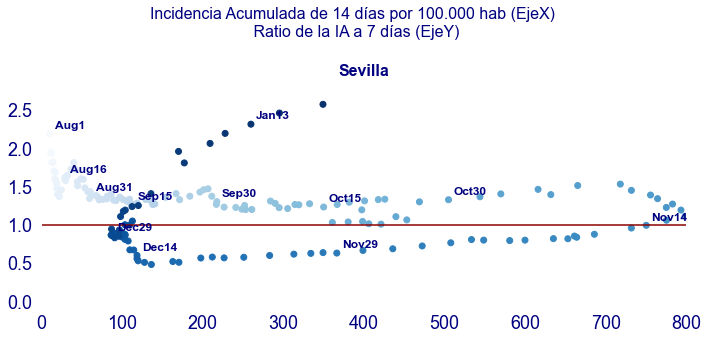

In [196]:
grafico_IA14_ratio_vs(datos,campos,['Sevilla'],'sevilla')

1 2


<Figure size 1080x1080 with 0 Axes>

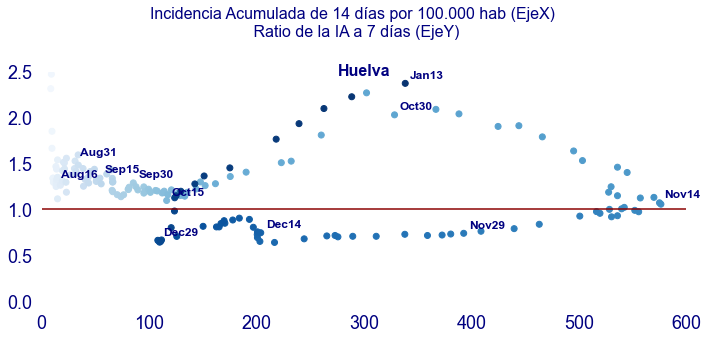

In [197]:
grafico_IA14_ratio_vs(datos,campos,['Huelva'],'huelva')

3 2.5


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

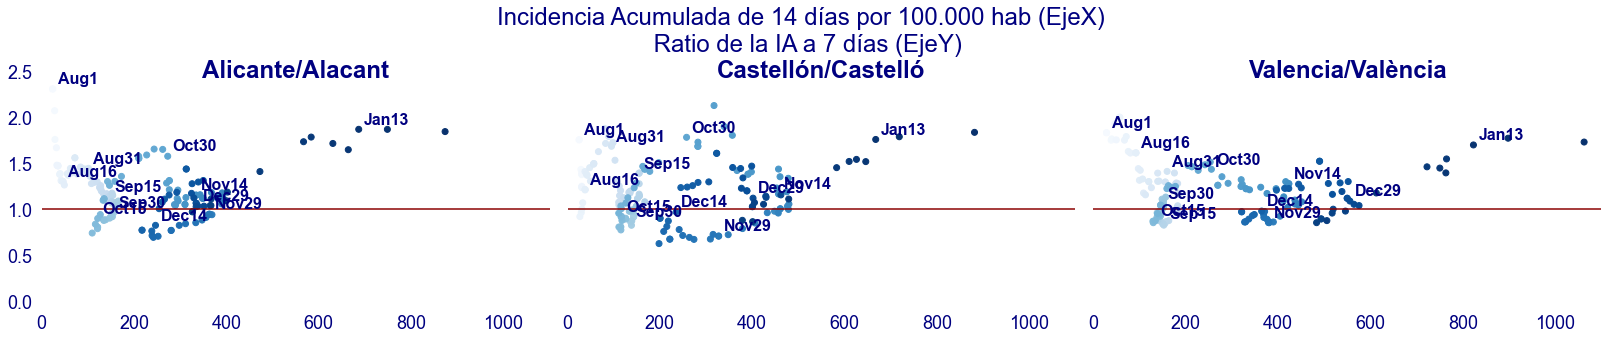

In [198]:
grafico_IA14_ratio_vs(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

3 2


/opt/anaconda3/envs/CoVid/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x1080 with 0 Axes>

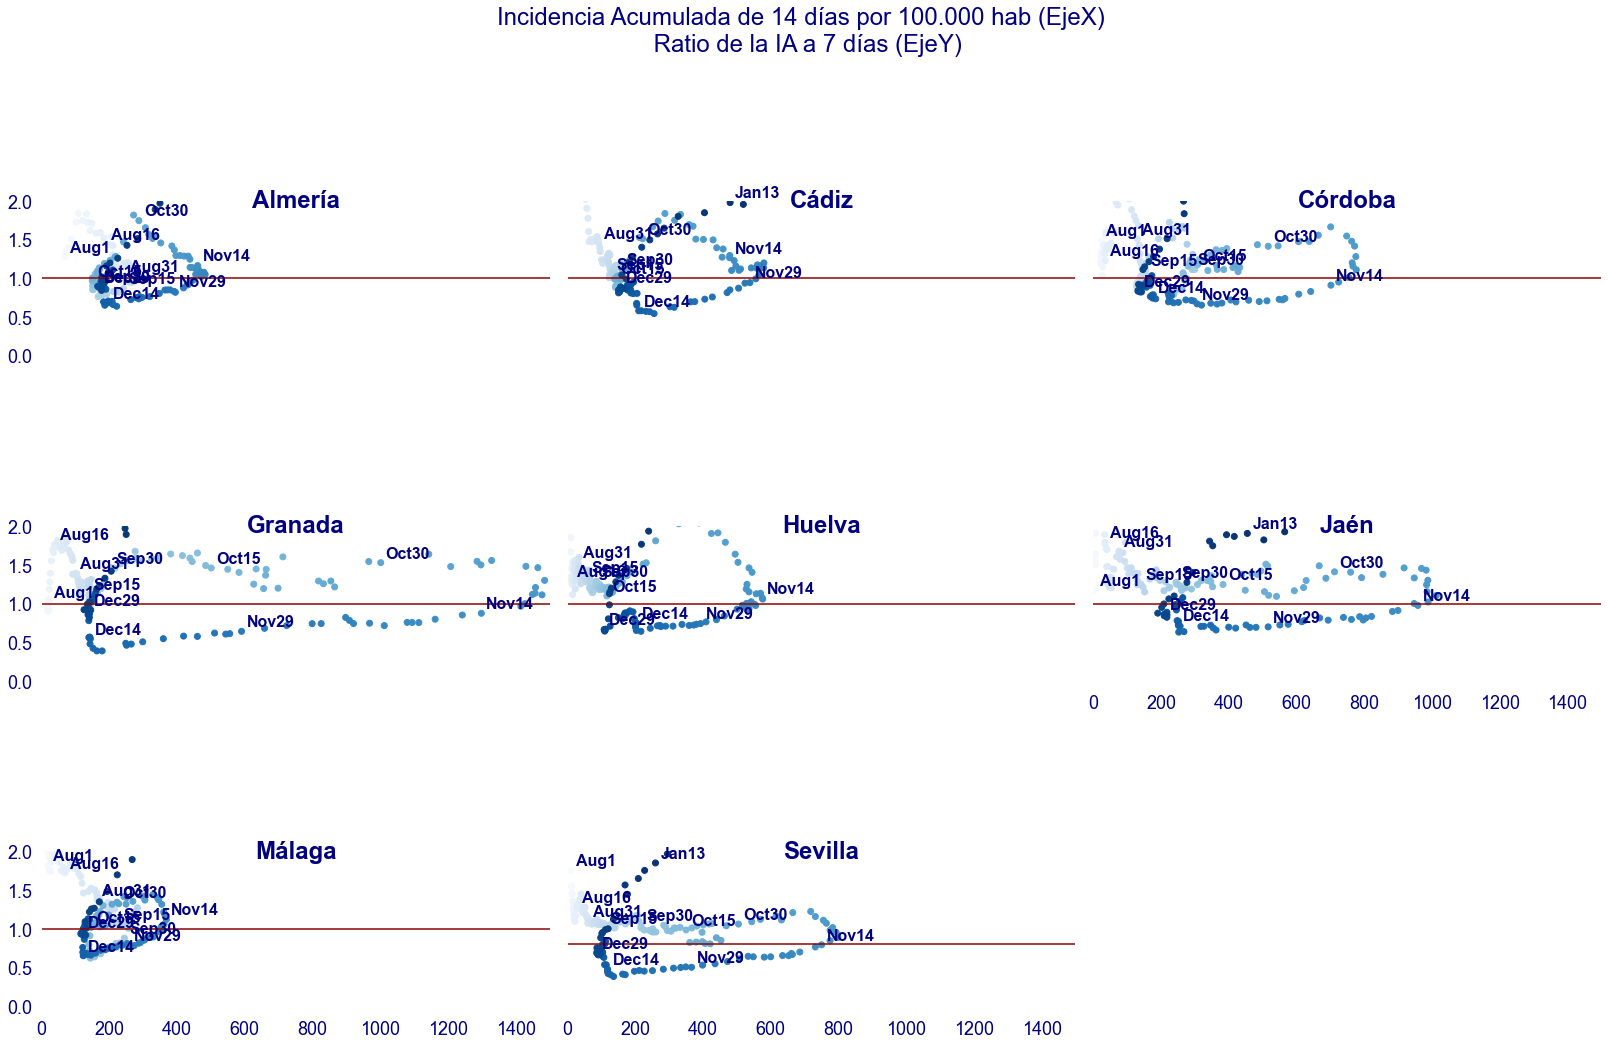

In [199]:
grafico_IA14_ratio_vs(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')